Natural Language Processing in Tensorflow
---------------------------------------------------------------
1. Sentiment in text
1. Word Embeddings
1. Sequence models
1. **Sequence models and literature**

Sequence Models and Literature
-----------------
- Week3에서는 RNN, LSTM의 Sequential한 Architecture를 이용해서 문맥을 전달하는 방법에 대해서 학습함
- Sequence model로 문맥을 전달할 수 있기 때문에 특정 text를 학습한 다음 새로운 텍스트를 생성하거나 합성할 수 있음
- Week4에서는 Week3에서의 내용을 기반으로 새로운 문자를 생성하는 방법에 대해서 배울 예정
- 훈련 데이터를 기반으로 다음에 나올 단어 예측

**Note:** This notebook can run using TensorFlow 2.5.0

In [1]:
!pip install tensorflow==2.5.0

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

- 아래 코드 구현에 필요한 module 불러오기

In [3]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

- data: traditional Irish song을 한줄로 입력
- corpus = data.lower().split("\n"): data를 모두 소문자로 바꾸고, 개행문자를 기준으로 split해 문장 list 생성
- tokenizer.fit_on_texts(corpus): corpus의 단어들을 이용해서 단어와 키 값의 쌍으로 이루어진 dictionary 생성
- total_words = len(tokenizer.word_index) + 1: 뒤에 1을 더하는 이유는 out of vocab을 고려해줘야 하기 때문

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

- corpus를 training data로 바꾸는 과정
  * input_sequnces = []: 다음에 올 단어를 예측하기 위해 학습하는 데이터(X), python list 형태로 구현
  * token_list = tokenizer.texts_to sequences([line])[0]: 라인마다 토큰으로 구성된 시퀀스 생성(e.g. In the town of Athy one Jeremy Lanigan -> [4 2 66 8 67 68 69 70]
  * n_gram_sequence 생성: 예를 들어 [4 2 66 8 67 68 69 70]와 같은 line이 들어오면 input_sequences에 차례대로 [4 2], [4 2 66], [4 2 66 8], ... , [4 2 66 8 67 68 69 70]을 append
  * max_sequence_len: 가장 긴 문장의 길이를 찾음
  * input_sequences = np.array(...): 가장 긴 문장의 길이를 기준으로 모든 sequence를 padding하여 길이가 동일하게 만드는 과정
  * Input(X)와 Label(Y) 설정: 예컨대 Padded Input Sequences 중 하나가 [0 0 0 0 0 0 0 0 4 2 66 8]이라고 가정, 이때 Label은 list의 맨 마지막의 값만 취하게 되는데, 이 예제에서는 X = [0 0 0 0 0 0 0 0 4 2 66], Y = [8]을 취하게 됨
  * ys = tf.keras.utils.to_categorical(labels, num_classes=total_words): Label을 one hot encoding 하는 과정(classification problem)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


- Tokenizer로 생성된 단어 index를 확인하는 모습

In [6]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


- xs로부터 뽑아낸 training data를 확인하는 모습

In [7]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- 위 xs[6]의 list 형태로 비추어보았을 때, label이 가벼야 하는 값은 70
- 위는 70의 index를 가진 단어를 one hot encoding한 모습(list의 70번째에 1이 있는 것을 확인할 수 있음)

In [8]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- 위와 같이 69번째 요소에 1이 출력되면서 training data와 label의 one hot encoding 확인 가능

In [9]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

- tokenzier의 word_index확인

In [10]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 2s 6ms/step - loss: 5.5668 - accuracy: 0.0177
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5355 - accuracy: 0.0596
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 5.4556 - accuracy: 0.0618
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 5.2736 - accuracy: 0.0530
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 5.1161 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0511 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0116 - accuracy: 0.0552
Epoch 8/500
15/15 [==============================] - 0s 4ms/step - loss: 4.9736 - accuracy: 0.0552
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 4.9350 - accuracy: 0.0552
Epoch 10/500
15/15 [==============================] - 0s 4ms/step - loss: 4.8869 - accuracy: 0.0552
Epoch 11/

- total_words를 64차원으로 plot
- 20개의 LSTM unit을 가지는 Bidirectional LSTM 사용
- softmax를 activation fn으로 가지는 Dense Layer 사용
- one hot encoding을 사용하므로 loss fn으로는 categorical_crossentropy 사용
- 데이터가 그렇게 많지 않으므로 500개의 epoch을 가지고 학습 진행

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

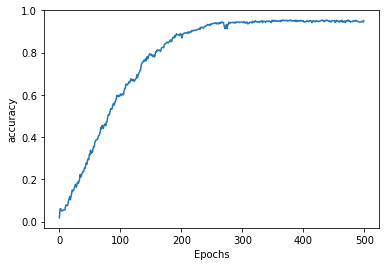

In [12]:
plot_graphs(history, 'accuracy')


In [13]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

C:\Users\sykan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin lashings time for for lanigans ball forget til ball forget til ball ball ball long wall wall long long weeks by wall long weeks by and and wall all mavrone forget relations relations relations long long weeks wall long weeks long at by by and in both wall all old hall swore eyes didnt long in relations forget relations long long relations weeks long long weeks all dublin in dublin dublin dublin at old forget relations long long weeks weeks weeks weeks weeks all dublin all dublin dublin all nonsensical polkas polkas ill your glisten glisten glisten glisten glisten right


- 학습한 내용을 가지고 단어를 예측하는 방법
    * "Laurence went to dublin" 다음에 올 100단어에 대해서 학습 모델한테 물어보는 예제
    * 100개의 다음 단어마다 seed text의 tokenizer.text_to_seqeunces를 사용해 token_list 생성
    * 다음 이 list를 padding한 다음 predict_classes 메소드에 집어넣어서 출력 단어를 얻음(tensorflow 2.6.0부터는 미지원)
    * 이 예측된 단어는 다음 단어를 예측할 때도 사용되고, 이러한 방법은 seed text에서 멀어질 수로 부정확하고 말이 안되는 문장을 출력하는 결과를 초래함